<a href="https://colab.research.google.com/github/alecseiterr/Tetrabot/blob/main/Andrey_Novikov/002_notebooks/wav_files_splitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Данный ноутбук предназначен для автоматической нарезки аудиофрагментов по паузам между ними

## Загрузка и импорт модулей

In [1]:
# Загрузка библиотеки обработки аудиофайлов
!pip install pydub

In [3]:
# Загрузка модулей
import os
import librosa
import shutil
import numpy as np
import matplotlib.pyplot as plt
from pydub import AudioSegment
from pydub import silence

In [4]:
# Проверка текущего пути к рабочей папке
os.getcwd()

'/content'

Подключаем диск (здесь сделано через кнопку в меню Файлы в Google colab)
Размещаем в папке tetrabot папки из ТЗ

## Выполняем подготовку

In [ ]:
# Устанавливаем путь к новой рабочей папке на google-диске
PATH = '/content/drive/MyDrive/AI_data/tetrabot'
os.chdir(PATH)
os.getcwd()

'/content/drive/MyDrive/AI_data/tetrabot'

In [5]:
# Задаем папку источник и целевую папку
source_dir = './tetrabot'
target_dir = './tetrabot_new'

In [6]:
# Создаем функцию для преобразования кириллицы в латиницу согласно заданному словарю
def latinizator(letter, dic):
    for i, j in dic.items():
        letter = letter.replace(i, j)
    return letter

legend = {
' ':'_',
',':'',
'а':'a',
'б':'b',
'в':'v',
'г':'g',
'д':'d',
'е':'e',
'ё':'yo',
'ж':'zh',
'з':'z',
'и':'i',
'й':'y',
'к':'k',
'л':'l',
'м':'m',
'н':'n',
'о':'o',
'п':'p',
'р':'r',
'с':'s',
'т':'t',
'у':'u',
'ф':'f',
'х':'h',
'ц':'c',
'ч':'ch',
'ш':'sh',
'щ':'shch',
'ъ':'y',
'ы':'y',
'ь':"'",
'э':'e',
'ю':'yu',
'я':'ya',

'А':'A',
'Б':'B',
'В':'V',
'Г':'G',
'Д':'D',
'Е':'E',
'Ё':'Yo',
'Ж':'Zh',
'З':'Z',
'И':'I',
'Й':'Y',
'К':'K',
'Л':'L',
'М':'M',
'Н':'N',
'О':'O',
'П':'P',
'Р':'R',
'С':'S',
'Т':'T',
'У':'U',
'Ф':'F',
'Х':'H',
'Ц':'Ts',
'Ч':'Ch',
'Ш':'Sh',
'Щ':'Shch',
'Ъ':'Y',
'Ы':'Y',
'Ь':"'",
'Э':'E',
'Ю':'Yu',
'Я':'Ya',
}

In [ ]:
# Выполняем преобразование имен папок и файлов (латинизация, подчеркивание, строчные буквы)
directory = ['Голос близко', 'голос шагоход/Голос близко', 'голос шагоход/Голос близко + шум', 'голос шагоход/Голос далеко', 'голос шагоход/голос далеко + шум', 'Тетработ голос']
for dir in directory:
  print(source_dir + f'/{dir}')
  for file_old in os.listdir(source_dir + f'/{dir}'):
    new_dir = latinizator(dir, legend)
    new_dir = new_dir.lower()
    file_new = latinizator(file_old, legend)
    file_new = file_new.lower()
    os.makedirs(target_dir + f'/{new_dir}', exist_ok=True)
    shutil.copyfile(os.path.join((source_dir + f'/{dir}'),file_old), os.path.join((target_dir + f'/{new_dir}'),file_new))

./tetrabot/Голос близко
./tetrabot/голос шагоход/Голос близко
./tetrabot/голос шагоход/Голос близко + шум
./tetrabot/голос шагоход/Голос далеко
./tetrabot/голос шагоход/голос далеко + шум
./tetrabot/Тетработ голос


## Нарезка


In [ ]:
# Обход всех файлов wav в заданной папке
for dirpath, dirs, _ in os.walk(target_dir):
  for dir in dirs:
    # Полный путь к файлу
    file_path =  os.path.join(dirpath,dir)
    print(file_path)
    # Обход всех файлов wav в текущем каталоге
    counter = 0
    for filename in os.listdir(file_path):
      if filename.endswith('.wav'):
        counter +=1
        # Чтение исходного wav-файла
        sound = AudioSegment.from_wav(os.path.join(file_path, filename))
        # Нахождение пауз в исходном аудио-файле согласно параметрам и разрезание на сегменты - чанки
        chunks = silence.split_on_silence(sound, min_silence_len=280, silence_thresh=-33, keep_silence=550)
        for i, chunk in enumerate(chunks):
            print(f'Файл {filename}, чанк ', i)
            # Экспорт каждого чанка в новый wav-файл
            chunk.export(file_path+f"/{filename[:-4]}_chunk{i}.wav", format="wav")

./tetrabot_new/golos_blizko
Файл podnimaĭ_ruku_vverh.wav, чанк  0
Файл izmenyaĭ_temp_dvizheniya.wav, чанк  0
Файл ruki_-_kakie_ruki.wav, чанк  0
Файл ruki_-_kakie_ruki.wav, чанк  1
Файл izmenyaĭ_shagovuyu_dlinu.wav, чанк  0
Файл povorachivaĭ_vlevo_na_ukazannyĭ_ugol.wav, чанк  0
Файл opuskayu_ruku_vniz.wav, чанк  0
Файл povorachivaĭ_vpravo_na_ukazannyĭ_ugol.wav, чанк  0
Файл vzaimodeĭstvuĭ_s_obyektami.wav, чанк  0
Файл izmenĭya_rezhim_dvizheniya.wav, чанк  0
Файл podnimaĭsya_na_ukazannuyu_vysotu.wav, чанк  0
Файл podnimaĭsya_na_ukazannuyu_vysotu.wav, чанк  1
Файл uvelichivaĭ_skorost'_dvizheniya.wav, чанк  0
Файл uvelichivaĭ_skorost'_dvizheniya.wav, чанк  1
Файл izmenyaĭ_skorost'.wav, чанк  0
Файл izmenyaĭ_skorost'.wav, чанк  1
Файл vklyuchaĭ_avtomaticheskiĭ_rezhim.wav, чанк  0
Файл vklyuchaĭ_avtomaticheskiĭ_rezhim.wav, чанк  1
Файл vklyuchaĭ_avtomaticheskiĭ_rezhim.wav, чанк  2
Файл povyshaĭ_gromkost'.wav, чанк  0
Файл povyshaĭ_gromkost'.wav, чанк  1
Файл povyshai

## Нарезка в одной из папок с другими параметрами

In [ ]:
# Отдельная нарезка для папки golos_daleko (потребовались другие параметры)
filepath = './tetrabot_new/golos_shagohod/golos_daleko'
for filename in os.listdir(file_path):
  print('filename = ', filename)
  # Чтение исходного wav-файла
  sound = AudioSegment.from_wav(os.path.join(file_path, filename))
  chunks = silence.split_on_silence(sound, min_silence_len=380, silence_thresh=-60, keep_silence=550, seek_step=10)

  for i, chunk in enumerate(chunks):
      print(f'Файл {filename}, чанк ', i)
      chunk.export(file_path+f"/{filename[:-4]}_chunk{i}.wav", format="wav")
      AUDIO_FILE = file_path+f"/{filename[:-4]}_chunk{i}.wav"

filename =  vzaimodeĭstvuĭ_s_obyektom.wav
Файл vzaimodeĭstvuĭ_s_obyektom.wav, чанк  0
Файл vzaimodeĭstvuĭ_s_obyektom.wav, чанк  1
filename =  perestraivaĭsya_v_druguyu_konfiguraciyu.wav
Файл perestraivaĭsya_v_druguyu_konfiguraciyu.wav, чанк  0
filename =  izmenyaĭ_rezhim_dvizheniya.wav
Файл izmenyaĭ_rezhim_dvizheniya.wav, чанк  0
filename =  povorachivaĭ_vpravo_na_ukazanyĭ_ugol.wav
Файл povorachivaĭ_vpravo_na_ukazanyĭ_ugol.wav, чанк  0
filename =  opuskaĭ_ruku_vniz..wav
Файл opuskaĭ_ruku_vniz..wav, чанк  0
filename =  izmenyaĭ_temp_dvizheniya.wav
Файл izmenyaĭ_temp_dvizheniya.wav, чанк  0
filename =  izmenyaĭ_skorost'.wav
Файл izmenyaĭ_skorost'.wav, чанк  0
Файл izmenyaĭ_skorost'.wav, чанк  1
filename =  preodolevaĭ_prepyatstviya_na_puti.wav
Файл preodolevaĭ_prepyatstviya_na_puti.wav, чанк  0
Файл preodolevaĭ_prepyatstviya_na_puti.wav, чанк  1
filename =  vklyuchaĭ_avtomaticheskiĭ_rezhim.wav
Файл vklyuchaĭ_avtomaticheskiĭ_rezhim.wav, чанк  0
Файл vklyuchaĭ_

## Исследование проблемы с папкой golos_daleko

[]
[[0, 4281]]


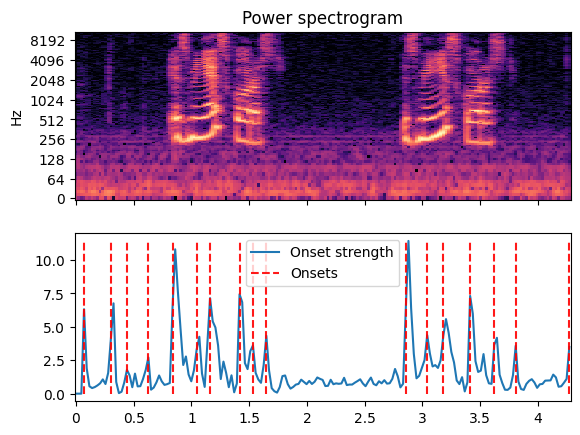

In [ ]:
# Исследование проблемы с папкой golos_daleko (подбор параметров, визуализация)
filepath = './tetrabot_new/golos_shagohod/golos_daleko'
filename =  "izmenyaĭ_skorost'.wav"
sound = AudioSegment.from_wav(os.path.join(file_path, filename))
print(sound)
chunks = silence.split_on_silence(sound, min_silence_len=280, silence_thresh=-33, keep_silence=550)
silent_sections = silence.detect_silence(sound, min_silence_len=280, silence_thresh=-33, seek_step=1)
print(chunks)
print(silent_sections)
y, sr = librosa.load(os.path.join(file_path, filename))
o_env = librosa.onset.onset_strength(y=y, sr=sr)
times = librosa.times_like(o_env, sr=sr)
onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=sr)
D = np.abs(librosa.stft(y))
fig, ax = plt.subplots(nrows=2, sharex=True)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),
                        x_axis='time', y_axis='log', ax=ax[0])
ax[0].set(title='Power spectrogram')
ax[0].label_outer()
ax[1].plot(times, o_env, label='Onset strength')
ax[1].vlines(times[onset_frames], 0, o_env.max(), color='r', alpha=0.9,
          linestyle='--', label='Onsets')
ax[1].legend()

chunks =  [<pydub.audio_segment.AudioSegment object at 0x7ed9fb0919c0>, <pydub.audio_segment.AudioSegment object at 0x7ed9fae98dc0>]
silent_sections [[0, 850], [1640, 2850], [3660, 4281]]


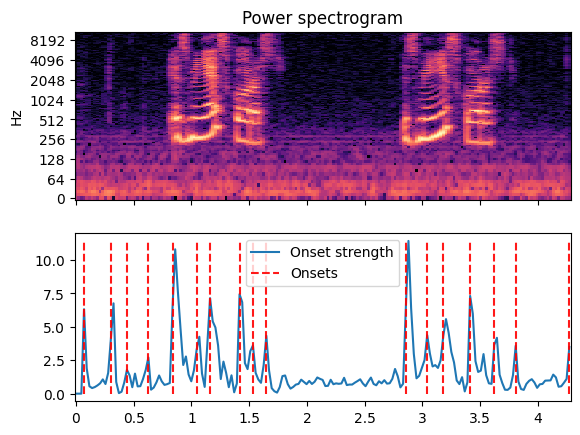

In [ ]:
filepath = './tetrabot_new/golos_shagohod/golos_daleko_+_shum'
filename =  "izmenyaĭ_skorost'.wav"
sound = AudioSegment.from_wav(os.path.join(file_path, filename))
print(sound)
chunks = silence.split_on_silence(sound, min_silence_len=400, silence_thresh=-60, keep_silence=550, seek_step=10)
silent_sections = silence.detect_silence(sound, min_silence_len=400, silence_thresh=-60, seek_step=10)
print('chunks = ', chunks)
print('silent_sections', silent_sections)
y, sr = librosa.load(os.path.join(file_path, filename))
o_env = librosa.onset.onset_strength(y=y, sr=sr)
times = librosa.times_like(o_env, sr=sr)
onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=sr)
D = np.abs(librosa.stft(y))
fig, ax = plt.subplots(nrows=2, sharex=True)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),
                        x_axis='time', y_axis='log', ax=ax[0])
ax[0].set(title='Power spectrogram')
ax[0].label_outer()
ax[1].plot(times, o_env, label='Onset strength')
ax[1].vlines(times[onset_frames], 0, o_env.max(), color='r', alpha=0.9,
          linestyle='--', label='Onsets')
ax[1].legend()